<a href="https://www.kaggle.com/thirumani/shark-tank-india-analysis?scriptVersionId=88289747" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Shark Tank India (Season 1) Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/thirumani/shark-tank-india

In [1]:
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2022-Feb-20


### Importing Required Python Libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


### Check and import dataset

In [3]:
! ls -l /kaggle/input/d/thirumani/shark-tank-india/
shark_tank = pd.read_csv('/kaggle/input/d/thirumani/shark-tank-india//Shark Tank India.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 20
-rw-r--r-- 1 nobody nogroup 20187 Feb 19 10:38 'Shark Tank India.csv'

There are 121 rows and 49 columns in the dataset


## Exploratory Data Analysis (EDA)

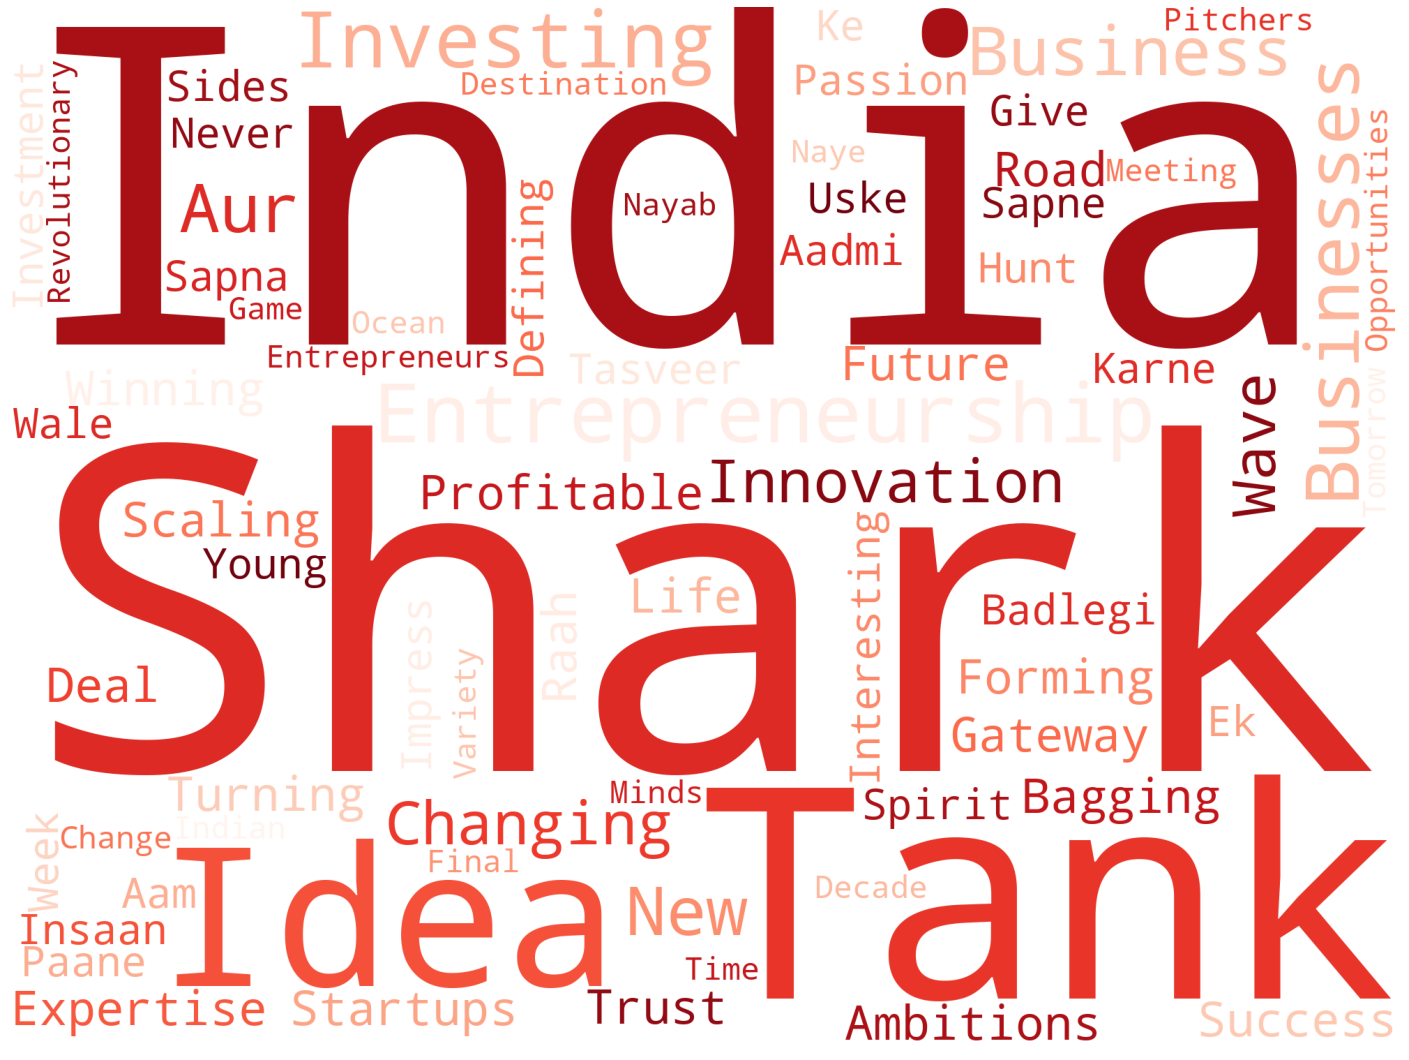

In [4]:
# Word cloud based on episode titles
text = " Shark Tank India ".join(cat for cat in shark_tank['Episode Title'])
stop_words = list(STOPWORDS) + ["Ka", "Ki", "Ko"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='white', colormap='Reds', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [5]:
shark_tank.head(5)

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,3,2.0,1.0,NaN,NaN,NaN,NaN,NaN,95.0,800000.0,NaN,50.0,5.0,1000,1,1.0,75.0,16.00,NaN,469.0,25.0,5.33,NaN,0.0,0.0,NaN,0.0,0.0,NaN,25.0,5.33,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,1,1.0,NaN,0.0,NaN,NaN,NaN,NaN,4.0,40000.0,NaN,40.0,15.0,267,1,1.0,40.0,50.00,NaN,80.0,20.0,25.00,NaN,0.0,0.0,NaN,0.0,0.0,NaN,20.0,25.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,200000.0,NaN,25.0,10.0,250,1,1.0,25.0,30.00,NaN,83.0,0.0,0.00,NaN,0.0,0.0,NaN,12.5,15.0,NaN,12.5,15.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,48.0,70.0,1.0,7000,1,1.0,70.0,2.75,NaN,2545.0,70.0,2.75,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,4,1.0,3.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,50.0,5.0,1000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
shark_tank.tail(10).T

,111,112,113,114,115,116,117,118,119,120
Season Number,1,1,1,1,1,1,1,1,1,1
Episode Number,34,34,34,35,35,35,36,36,36,36
Episode Title,Scaling Ambitions,Scaling Ambitions,Scaling Ambitions,The Final Destination,The Final Destination,The Final Destination,Gateway To Shark Tank India,Gateway To Shark Tank India,Gateway To Shark Tank India,Gateway To Shark Tank India
Pitch Number,112,113,114,115,116,117,118,119,120,121
Startup Name,Twee in One,Green Protein,On2Cook,Jain Shikanji,Woloo,Elcare India,SneaKare,French Crown,Store My Goods,Devnagri
Industry,Beauty/Fashion,Food,Food,Food,Technology,Medical,Beauty/Fashion,Beauty/Fashion,Services,Technology
Business Description,Reversible and convertible clothing,Plant-Based Protein,Fastest Cooking Device,Lemonade,Washroom Finder,Carenting for Elders,Shoe Sneaker kits storage crates,Clothes,Storage solutions,Translation of language content
Number of Presenters,1,2,1,1,3,3,1,2,3,2
Male Presenter,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
Female Presenter,1.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,1.0,NaN


In [7]:
shark_tank['Male Presenter'] = shark_tank['Male Presenter'].astype(pd.Int32Dtype())
shark_tank['Female Presenter'] = shark_tank['Female Presenter'].astype(pd.Int32Dtype())
shark_tank['Started in'] = shark_tank['Started in'].astype(pd.Int32Dtype())
shark_tank['Yearly Revenue'] = shark_tank['Yearly Revenue'].astype(pd.Int32Dtype())
shark_tank['Monthly Sales'] = shark_tank['Monthly Sales'].astype(pd.Int32Dtype())
shark_tank['Valuation Offered'] = shark_tank['Valuation Offered'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10)

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
86,1,27,Investing In The Future Of India,87,Aliste Technologies,Technology,Automation Solutions,6,6,<NA>,0.0,NaN,2020,NaN,NaN,<NA>,750000,40.0,60.0,5.0,1200,1,0.0,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,1,26,Revolutionary Ideas,82,Isak Fragrances,Beauty/Fashion,Perfumes Fragrances,1,<NA>,1,0.0,NaN,2016,Lucknow,Uttar Pradesh,<NA>,350000,NaN,50.0,8.0,625,1,1.0,50.0,50.0,NaN,100,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.0,0.0,NaN,NaN,NaN,NaN,50.0,50.00,NaN,0.0,0.0,NaN,1.0
108,1,33,Life-Changing Ideas,109,Tweek Labs,Sports,Sportswear,4,4,<NA>,0.0,NaN,<NA>,NaN,NaN,<NA>,<NA>,NaN,40.0,2.0,2000,1,1.0,60.0,10.0,NaN,600,20.0,3.33,NaN,0.0,0.0,NaN,20.0,3.33,NaN,NaN,NaN,NaN,0.0,0.00,NaN,20.0,3.33,NaN,NaN,NaN,NaN,3.0
14,1,5,Hunt For Interesting Business,15,Shrawani Engineers,Beauty/Fashion,Belly Button Shaper,2,1,1,NaN,NaN,<NA>,NaN,NaN,<NA>,<NA>,NaN,20.0,10.0,200,0,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,1,13,Ideas By Young Entrepreneurs,37,Annie,Education,Thinkerbell labs Braille Literary Device,4,3,1,NaN,NaN,<NA>,NaN,NaN,<NA>,400000,NaN,30.0,0.5,6000,1,1.0,105.0,3.0,NaN,3500,0.0,0.00,NaN,35.0,1.0,NaN,35.0,1.00,NaN,NaN,NaN,NaN,0.0,0.00,NaN,35.0,1.00,NaN,NaN,NaN,NaN,3.0
114,1,35,The Final Destination,115,Jain Shikanji,Food,Lemonade,1,1,<NA>,0.0,NaN,<NA>,Modinagar,Uttar Pradesh,<NA>,200000,NaN,40.0,8.0,500,1,1.0,40.0,30.0,NaN,133,10.0,7.50,NaN,0.0,0.0,NaN,10.0,7.50,NaN,10.0,7.5,NaN,10.0,7.50,NaN,0.0,0.00,NaN,0.0,0.0,NaN,4.0
21,1,8,Shark Ko Impress Karne Wale Ideas,22,Beyond Snack,Food,Kerala Banana Chips,1,1,<NA>,0.0,NaN,<NA>,Thiruvananthapuram,Kerala,<NA>,2060000,51.0,50.0,2.5,2000,1,1.0,50.0,2.5,NaN,2000,25.0,1.25,NaN,0.0,0.0,NaN,0.0,0.00,NaN,NaN,NaN,NaN,25.0,1.25,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2.0
39,1,14,Naye Aur Nayab Pitchers,40,The Renal Project,Medical,Home Dialysis Treatment,1,1,<NA>,0.0,NaN,<NA>,NaN,NaN,<NA>,<NA>,NaN,100.0,3.0,3333,1,1.0,100.0,6.0,NaN,1667,0.0,0.00,NaN,50.0,3.0,NaN,0.0,0.00,NaN,NaN,NaN,NaN,50.0,3.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2.0
82,1,26,Revolutionary Ideas,83,Julaa Automation,Manufacturing,Automatic Cradle,3,3,<NA>,0.0,NaN,<NA>,NaN,NaN,<NA>,0,NaN,50.0,10.0,500,0,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,1,32,The Road To Success,105,GrowFitter,Technology,Rewards App,2,2,<NA>,0.0,NaN,2021,NaN,NaN,170,<NA>,NaN,50.0,1.0,5000,1,1.0,50.0,2.0,NaN,2500,0.0,0.00,NaN,0.0,0.0,NaN,0.0,0.00,NaN,NaN,NaN,NaN,50.0,2.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,1.0


In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              121 non-null    int64  
 1   Episode Number             121 non-null    int64  
 2   Episode Title              121 non-null    object 
 3   Pitch Number               121 non-null    int64  
 4   Startup Name               121 non-null    object 
 5   Industry                   121 non-null    object 
 6   Business Description       121 non-null    object 
 7   Number of Presenters       121 non-null    int64  
 8   Male Presenter             102 non-null    Int32  
 9   Female Presenter           62 non-null     Int32  
 10  Couple Presenters          80 non-null     float64
 11  Pitchers Average Age       9 non-null      object 
 12  Started in                 31 non-null     Int32  
 13  Pitchers City              39 non-null     object 

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

,count,mean,std,min,25%,50%,75%,max
Season Number,121.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Episode Number,121.000000,19.310000,10.380000,1.000000,11.000000,19.000000,28.000000,36.000000
Pitch Number,121.000000,61.000000,35.070000,1.000000,31.000000,61.000000,91.000000,121.000000
Number of Presenters,121.000000,2.070000,0.920000,1.000000,1.000000,2.000000,3.000000,6.000000
Male Presenter,102.000000,1.730000,0.970000,1.000000,1.000000,1.000000,2.000000,6.000000
Female Presenter,62.000000,1.210000,0.480000,1.000000,1.000000,1.000000,1.000000,3.000000
Couple Presenters,80.000000,0.020000,0.160000,0.000000,0.000000,0.000000,0.000000,1.000000
Started in,31.000000,2018.480000,1.880000,2014.000000,2017.500000,2019.000000,2020.000000,2021.000000
Yearly Revenue,42.000000,460.400000,1163.350000,0.000000,64.750000,115.500000,266.500000,7200.000000
Monthly Sales,59.000000,1604444.070000,3307405.590000,0.000000,200000.000000,600000.000000,1900000.000000,20000000.000000


In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 1
Number of unique values in Episode Number - 36
Number of unique values in Episode Title - 36
Number of unique values in Pitch Number - 121
Number of unique values in Startup Name - 121
Number of unique values in Industry - 13
Number of unique values in Business Description - 121
Number of unique values in Number of Presenters - 5
Number of unique values in Male Presenter - 5
Number of unique values in Female Presenter - 3
Number of unique values in Couple Presenters - 2
Number of unique values in Pitchers Average Age - 3
Number of unique values in Started in - 7
Number of unique values in Pitchers City - 21
Number of unique values in Pitchers State - 14
Number of unique values in Yearly Revenue - 35
Number of unique values in Monthly Sales - 39
Number of unique values in Gross Margin - 22
Number of unique values in Original Ask Amount - 24
Number of unique values in Original Ask Equity - 19
Number of unique values in Valuation Requested - 50

## Season one of SHARK TANK INDIA was broadcasted in SonyLiv OTT
### In 36 episodes, there were _(real)_ 121 pitches

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "season \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

1 season 

36 episodes 

121 startup companies came for pitching 



Food                   37
Beauty/Fashion         22
Manufacturing          17
Technology             10
Education               8
Medical                 7
Services                6
Electrical Vehicles     4
Animal/Pets             3
Hardware                3
Sports                  2
Tourism                 1
Animation               1
Name: Industry, dtype: int64 



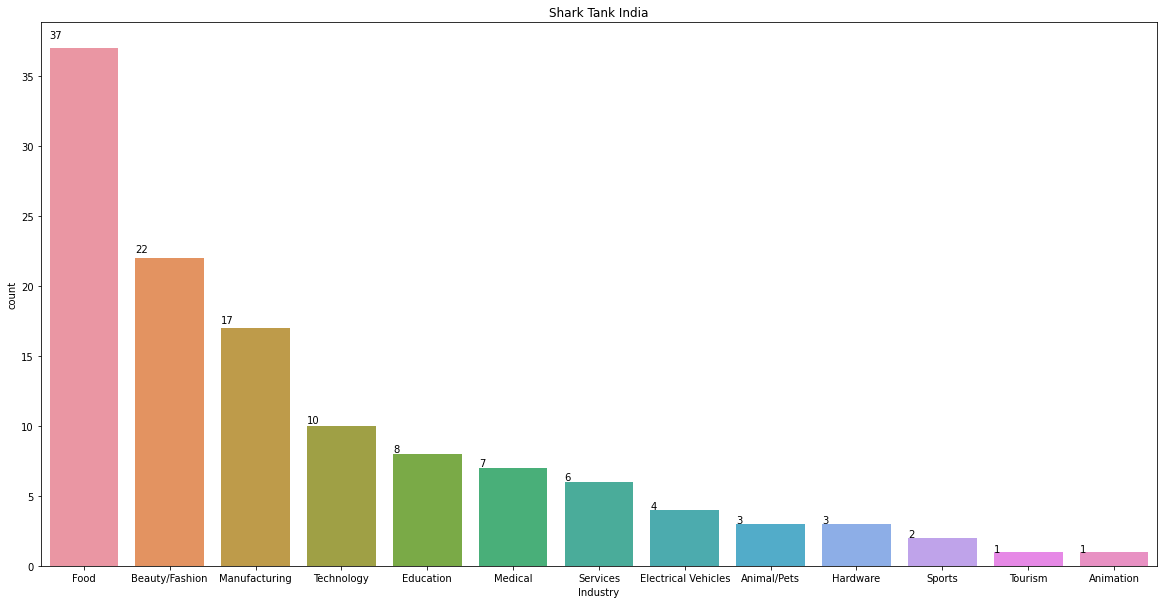

In [13]:
# Types of industries, came for pitching
print(shark_tank['Industry'].value_counts(), "\n")

fig = plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Industry', data=shark_tank, order=shark_tank['Industry'].value_counts().index)
ax.set_title('Shark Tank India')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02))

In [14]:
# Gender wise
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total male pitchers -", int(shark_tank['Male Presenter'].sum()), "\n")

print("Total female pitchers -", int(shark_tank['Female Presenter'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenter'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenter'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "% (data incomplete)\n", sep='')

Total pitchers - 251 

Total male pitchers - 176 

Total female pitchers - 75 

Male entrepreneurs percentage - 70.0%

Female entrepreneurs percentage - 30.0%

Couple entrepreneurs percentage - 1.0% (data incomplete)



#### 73% companies received offers and 27% startups could not convince Sharks to invest

1    88
0    33
Name: Received Offer, dtype: int64 

1    73%
0    27%
Name: Received Offer, dtype: object 



<AxesSubplot:xlabel='Received Offer', ylabel='count'>

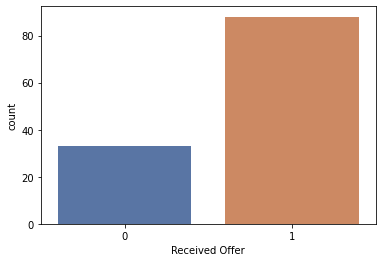

In [15]:
# Offers received
print(shark_tank['Received Offer'].value_counts(), "\n")
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=shark_tank, palette='deep')

# 88 companies received investments and 33 startups could not get offers

#### 76% companies accepted offers and 24% startups didn't accept Sharks offer

1.0    67
0.0    21
Name: Accepted Offer, dtype: int64 

1.0    76.0
0.0    24.0
Name: Accepted Offer, dtype: float64 



<AxesSubplot:xlabel='Accepted Offer', ylabel='count'>

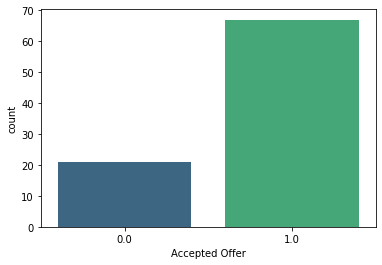

In [16]:
# Offers accepted
print(shark_tank['Accepted Offer'].value_counts(), "\n")
#print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100), "\n")
sns.countplot(x='Accepted Offer', data=shark_tank, palette="viridis")

# 67 companies accepted investments they got and 21 startup companies did not accept offer

In [17]:
# Offers rejected by pitchers/startup companies
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Startup Name","Original Ask Amount","Original Ask Equity"]]

,Startup Name,Original Ask Amount,Original Ask Equity
6,qZense Labs,100.0,0.25
19,Torch-it,75.0,1.00
20,La Kheer Deli,50.0,7.50
26,Kabira Handmad,100.0,5.00
40,Morriko Pure Foods,100.0,3.00
54,India Hemp and Co,50.0,4.00
59,Keto India,150.0,1.25
69,Moonshine,80.0,0.50
70,Falhari,50.0,2.00
72,Urban Monkey,100.0,1.00


In [18]:
# Sum of investment amount asked by all startup companies, in Shark Tank, in India
print(format_currency(shark_tank['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹378.23 crores


In [19]:
# Sum of amount invested by all sharks, in Shark Tank India
print(format_currency(shark_tank['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹39.03 crores


In [20]:
# Sum of loan/debt amount given by all sharks, in India Shark Tank
print(format_currency(shark_tank['Total Deal Debt'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹3.51 crores


In [21]:
# Top 14 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(14))

tmpdf = shark_tank.sort_values('Total Deal Amount', ascending=False)[0:14]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest Investment as per deal amount (in lakhs)", text=tmpdf['Total Deal Amount'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
Aas Vidyalaya          150.0
Annie                  105.0
Get-A-Whey             100.0
Hammer Lifestyle       100.0
Humpy A2               100.0
IN A CAN               100.0
Insurance Samadhan     100.0
Proxgy                 100.0
Raising Superstars     100.0
Revamp Moto            100.0
Skippi Ice Pops        100.0
Sunfox Technologies    100.0
The Renal Project      100.0
The Yarn Bazaar        100.0
Name: Total Deal Amount, dtype: float64


In [22]:
# Top 10 investments, as per total equity/shares percentage
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
Sid07 Designs          75.00
Booz Scooters          50.00
Isak Fragrances        50.00
Hammer Lifestyle       40.00
KG Agrotech            40.00
The Sass Bar           35.00
Vivalyf Innovations    33.33
Gold Safe Solutions    30.00
Heart up my Sleeves    30.00
Jain Shikanji          30.00
Name: Total Deal Equity, dtype: float64


In [23]:
# Top 5 investments, as per total debt/loan amount
print(shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(5))

tmpdf = shark_tank.sort_values('Total Deal Debt', ascending=False)[0:5]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per Debt amount (in lakhs)", text=tmpdf['Total Deal Debt'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
Otua              99.0
Namhya Foods      50.0
Store My Goods    50.0
Bamboo India      30.0
NOCD              30.0
Name: Total Deal Debt, dtype: float64


## Which shark invested most ?

In [24]:
# Maximum - as per Investment Amount
print("Aman invested -", max(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Aman invested - 8.94490016 crores


In [25]:
# Minimum - as per Investment Amount
print("Ghazal invested -", min(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Ghazal invested - 1.299902525 crores


In [26]:
# Maximum - as per Equity - who received maximum shares
print("Peyush got equity of -", max(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()), "% in different companies")

Peyush got equity of - 317.84000000000003 % in different companies


In [27]:
# Minimum - as per Equity - who received least amount of shares
print("Ghazal got equity of -", min(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()), "% in different companies")

Ghazal got equity of - 46.7 % in different companies


In [28]:
# Maximum - as per Debt/loaned Amount
print("Ashneer gave loan of -", max(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100), "crores")

Ashneer gave loan of - 1.17 crores


In [29]:
# Minimum - as per Debt/loaned Amount - Ghazal has not given any loan
print("Ghazal gave loan of -", min(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100), "crores")

Ghazal gave loan of - 0.0 crores


## my BIGG BOSS Dataset https://www.kaggle.com/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

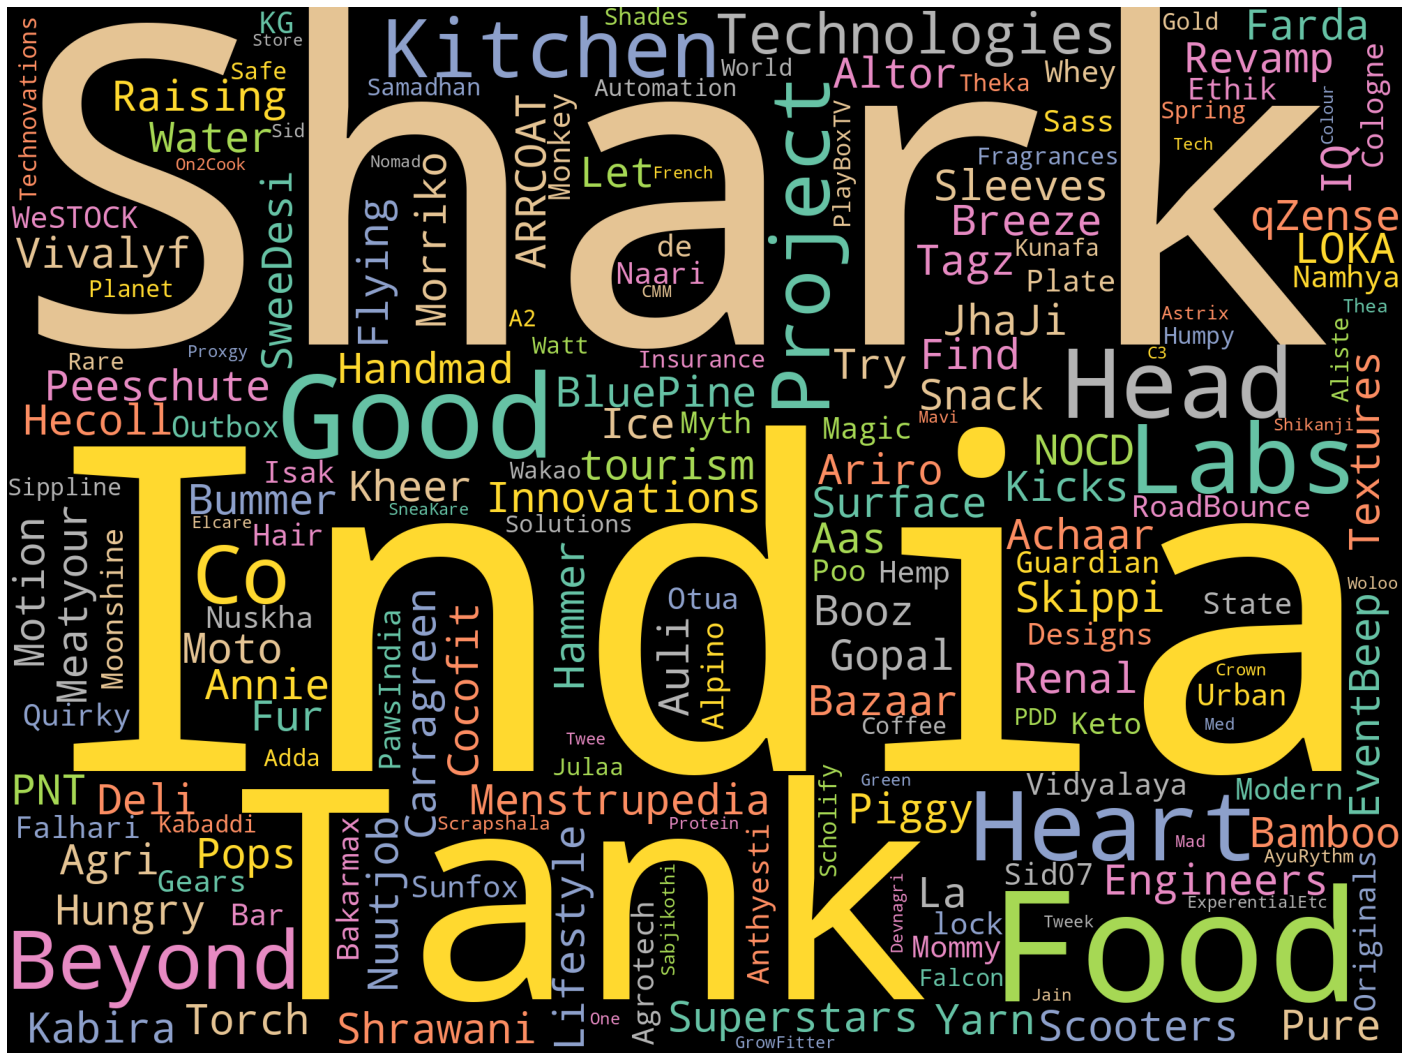

In [30]:
# Word cloud based on Startup Name
text = " Shark Tank India ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Ashneer Grover's Investments

Total investments by Ashneer 21
Investment amount by Ashneer 5.39 crores
Equity received by Ashneer 93.24 % in different companies
Debt/loan amount by Ashneer 1.14 crores

---------------------------------------------------------------------------
         Startup Name            Industry  Ashneer Investment Amount
       BluePine Foods                Food                      25.00
        Booz Scooters Electrical Vehicles                      20.00
           Tagz Foods                Food                      70.00
      Skippi Ice Pops                Food                      20.00
   Raising Superstars           Education                      50.00
         Beyond Snack                Food                      25.00
        Motion Breeze Electrical Vehicles                      30.00
            EventBeep           Education                      10.00
      The Yarn Bazaar       Manufacturing                      25.00
         Bamboo India       Manufacturing                     

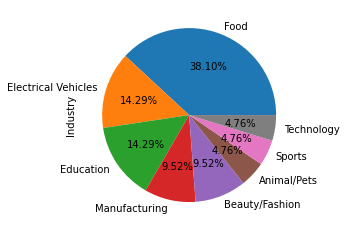

In [31]:
print("Total investments by Ashneer", shark_tank[shark_tank['Ashneer Investment Amount']>0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAshneer industry wise investments\n")
print(shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", title="<b>Total equity received by Ashneer (in %) for investment (in lakhs)</b>", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Namita Thapar's Investments

Total investments by Namita 24
Investment amount by Namita 6.8 crores
Equity received by Namita 140.78 % in different companies
Debt/loan amount by Namita 0.25 crores

---------------------------------------------------------------------------
         Startup Name       Industry  Namita Investment Amount
               Bummer Beauty/Fashion                 37.500000
      Skippi Ice Pops           Food                 20.000000
         Menstrupedia      Education                 50.000000
                Altor  Manufacturing                 25.000000
              Nuutjob Beauty/Fashion                  8.330000
                Farda Beauty/Fashion                 15.000000
                 Auli Beauty/Fashion                 75.000000
                Annie      Education                 35.000000
    The Renal Project        Medical                 50.000000
              Cocofit           Food                  0.000016
         Beyond Water           Food                 37.500000


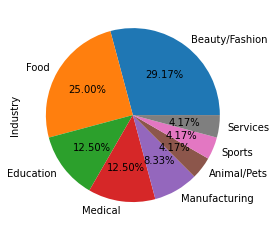

In [32]:
print("Total investments by Namita", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nNamita industry wise investments\n")
print(shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", title="<b>Total equity received by Namita (in %) for investment (in lakhs)</b>", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Anupam Mittal's Investments

Total investments by Anupam 24
Investment amount by Anupam 5.34 crores
Equity received by Anupam 166.35 % in different companies
Debt/loan amount by Anupam 0.15 crores

---------------------------------------------------------------------------
            Startup Name            Industry  Anupam Investment Amount
     Heart up my Sleeves      Beauty/Fashion                 12.500000
                  Cos IQ      Beauty/Fashion                 25.000000
             Revamp Moto Electrical Vehicles                 50.000000
         Skippi Ice Pops                Food                 20.000000
     Vivalyf Innovations             Medical                 28.000000
                Meatyour                Food                 10.000000
ARRCOAT Surface Textures       Manufacturing                 50.000000
                    LOKA          Technology                 13.330000
                   Annie           Education                 35.000000
              Carragreen       Manufacturing 

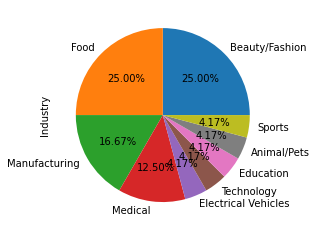

In [33]:
print("Total investments by Anupam", shark_tank[shark_tank['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAnupam industry wise investments\n")
print(shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", title="<b>Total equity received by Anupam (in %) for investment (in lakhs)</b>", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Vineeta Singh's Investments

Total investments by Vineeta 16
Investment amount by Vineeta 3.35 crores
Equity received by Vineeta 135.53 % in different companies
Debt/loan amount by Vineeta 0.3 crores

---------------------------------------------------------------------------
       Startup Name            Industry  Vineeta Investment Amount
     BluePine Foods                Food                      25.00
      Booz Scooters Electrical Vehicles                      20.00
Heart up my Sleeves      Beauty/Fashion                      12.50
               NOCD                Food                      20.00
             Cos IQ      Beauty/Fashion                      25.00
    Skippi Ice Pops                Food                      20.00
         Get-A-Whey                Food                      33.33
   The Quirky Naari      Beauty/Fashion                      17.50
Sunfox Technologies             Medical                      20.00
           Humpy A2                Food                      33.33
Gold Safe Solut

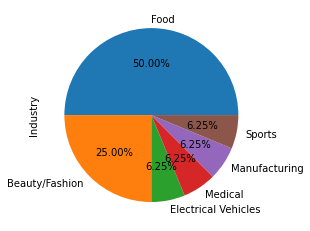

In [34]:
print("Total investments by Vineeta", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nVineeta industry wise investments\n")
print(shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", title="<b>Total equity received by Vineeta (in %) for investment (in lakhs)</b>", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Aman Gupta's Investments

Total investments by Aman 29
Investment amount by Aman 8.94 crores
Equity received by Aman 164.25 % in different companies
Debt/loan amount by Aman 0.5 crores

---------------------------------------------------------------------------
         Startup Name            Industry  Aman Investment Amount
       BluePine Foods                Food               25.000000
            Peeschute      Beauty/Fashion               75.000000
               Bummer      Beauty/Fashion               37.500000
          Revamp Moto Electrical Vehicles               50.000000
      Skippi Ice Pops                Food               20.000000
   Raising Superstars           Education               50.000000
         Beyond Snack                Food               25.000000
                Altor       Manufacturing               25.000000
                Ariro       Manufacturing               25.000000
              Nuutjob      Beauty/Fashion                8.330000
             Meatyour                F

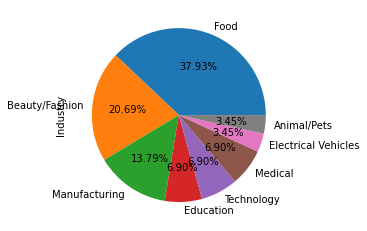

In [35]:
print("Total investments by Aman", shark_tank[shark_tank['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAman industry wise investments\n")
print(shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", title="<b>Total equity received by Aman (in %) for investment (in lakhs)</b>", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Peyush Bansal's Investments

Total investments by Peyush 28
Investment amount by Peyush 7.9 crores
Equity received by Peyush 317.84 % in different companies
Debt/loan amount by Peyush 1.17 crores

---------------------------------------------------------------------------
         Startup Name       Industry  Peyush Investment Amount
  Vivalyf Innovations        Medical                 28.000000
                Ariro  Manufacturing                 25.000000
              Nuutjob Beauty/Fashion                  8.330000
             Meatyour           Food                 10.000000
            EventBeep      Education                 10.000000
                 LOKA     Technology                 13.330000
                Annie      Education                 35.000000
           Carragreen  Manufacturing                 25.000000
      The Yarn Bazaar  Manufacturing                 25.000000
                  PNT     Technology                 25.000000
Find Your Kicks India Beauty/Fashion                 10.000000


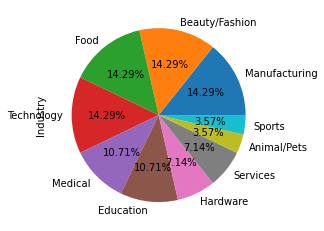

In [36]:
print("Total investments by Peyush", shark_tank[shark_tank['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nPeyush industry wise investments\n")
print(shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", title="<b>Total equity received by Peyush (in %) for investment (in lakhs)</b>", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## Ghazal Alagh's Investments

Total investments by Ghazal  7
Investment amount by Ghazal 1.3 crores
Equity received by Ghazal 46.7 % in different companies
Debt/loan amount by Ghazal 0.0 crores

---------------------------------------------------------------------------
       Startup Name       Industry  Ghazal Investment Amount
       The Sass Bar Beauty/Fashion                 25.000000
Sunfox Technologies        Medical                 20.000000
 Watt Technovations        Medical                  0.000253
           Humpy A2           Food                 33.330000
Gold Safe Solutions  Manufacturing                 16.660000
        Wakao Foods           Food                 25.000000
 Nomad Food Project           Food                 10.000000
---------------------------------------------------------------------------

Ghazal industry wise investments

Food              3
Medical           2
Beauty/Fashion    1
Manufacturing     1
Name: Industry, dtype: int64


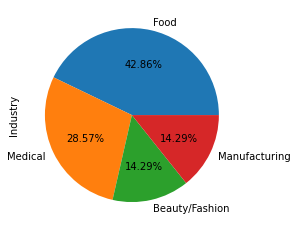

In [37]:
print("Total investments by Ghazal", shark_tank[shark_tank['Ghazal Investment Amount']>0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nGhazal industry wise investments\n")
print(shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(tmpdf, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name", title="<b>Total equity received by Ghazal (in %) for investment (in lakhs)</b>", text=tmpdf['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

1.0    22
2.0    21
3.0    15
4.0     5
5.0     4
Name: Number of sharks in deal, dtype: int64 

1.0    33%
2.0    31%
3.0    22%
4.0     7%
5.0     6%
Name: Number of sharks in deal, dtype: object


<AxesSubplot:xlabel='Number of sharks in deal', ylabel='count'>

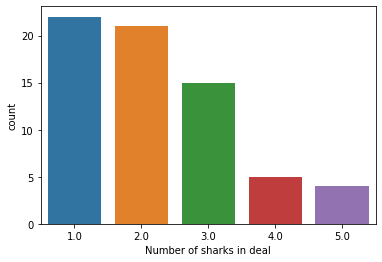

In [38]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))

sns.countplot(data = shark_tank, x = 'Number of sharks in deal')

In [39]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Startup Name","Total Deal Amount","Total Deal Equity"]])

             Startup Name  Total Deal Amount  Total Deal Equity
15        Skippi Ice Pops              100.0               15.0
49  Find Your Kicks India               50.0               25.0
63               IN A CAN              100.0               10.0
79    Sunfox Technologies              100.0                6.0


In [40]:
print(shark_tank['Pitchers City'].value_counts(), "\n")

Mumbai                9
Delhi                 4
Hyderabad             3
Surat                 2
Jammu                 2
Bangalore             2
Thiruvananthapuram    2
Gandhinagar           2
Mangalore             1
Pune, Delhi           1
Coimbatore            1
Banaras               1
Goa                   1
Darbhanga             1
Pune                  1
Lucknow               1
Dehradun              1
Malegaon              1
Mathura               1
Bangalore, Kolkata    1
Modinagar             1
Name: Pitchers City, dtype: int64 



In [41]:
print(shark_tank['Pitchers State'].value_counts(), "\n")

Maharashtra               11
Uttar Pradesh              4
Delhi                      4
Gujarat                    4
Telangana                  3
Karnataka                  3
Kerala                     2
Jammu & Kashmir            2
Bihar                      1
Karnataka, West Bengal     1
Uttarakhand                1
Goa                        1
Tamil Nadu                 1
Maharashtra, Delhi         1
Name: Pitchers State, dtype: int64 



In [42]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(shark_tank.set_index('Pitchers State'))
merged['Total Deal Amount'] = merged['Total Deal Amount'].fillna(0)

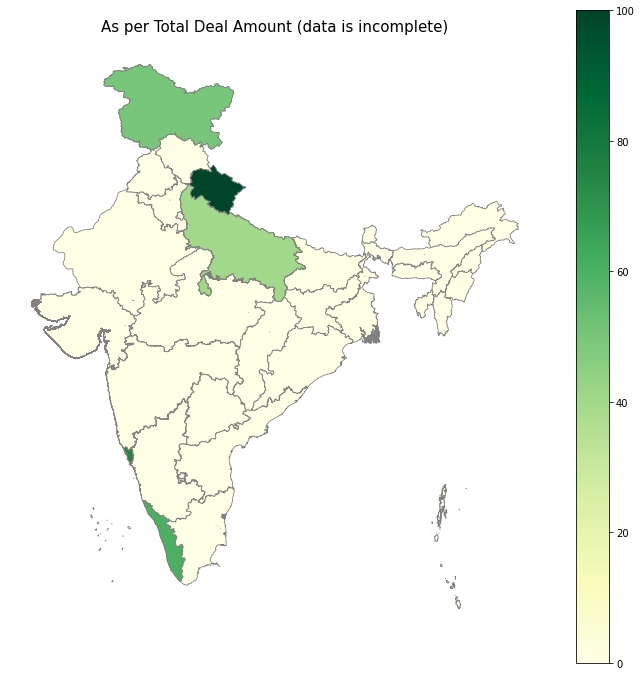

In [43]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('As per Total Deal Amount (data is incomplete)', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Total Deal Amount', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)

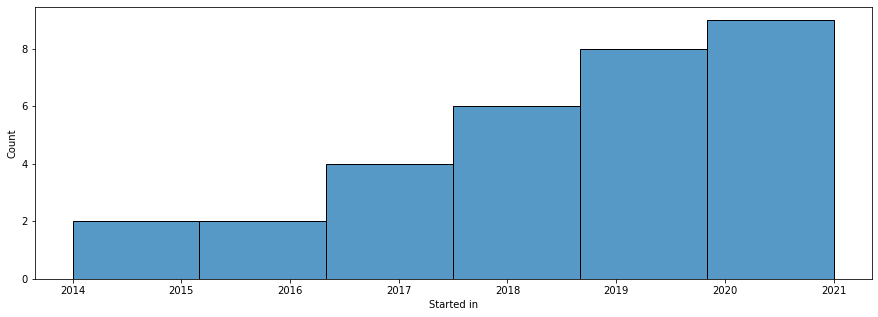

In [44]:
# Startup companies started in year
plt.figure(figsize = (15,5))
sns.histplot(data=shark_tank, x="Started in")
plt.show()

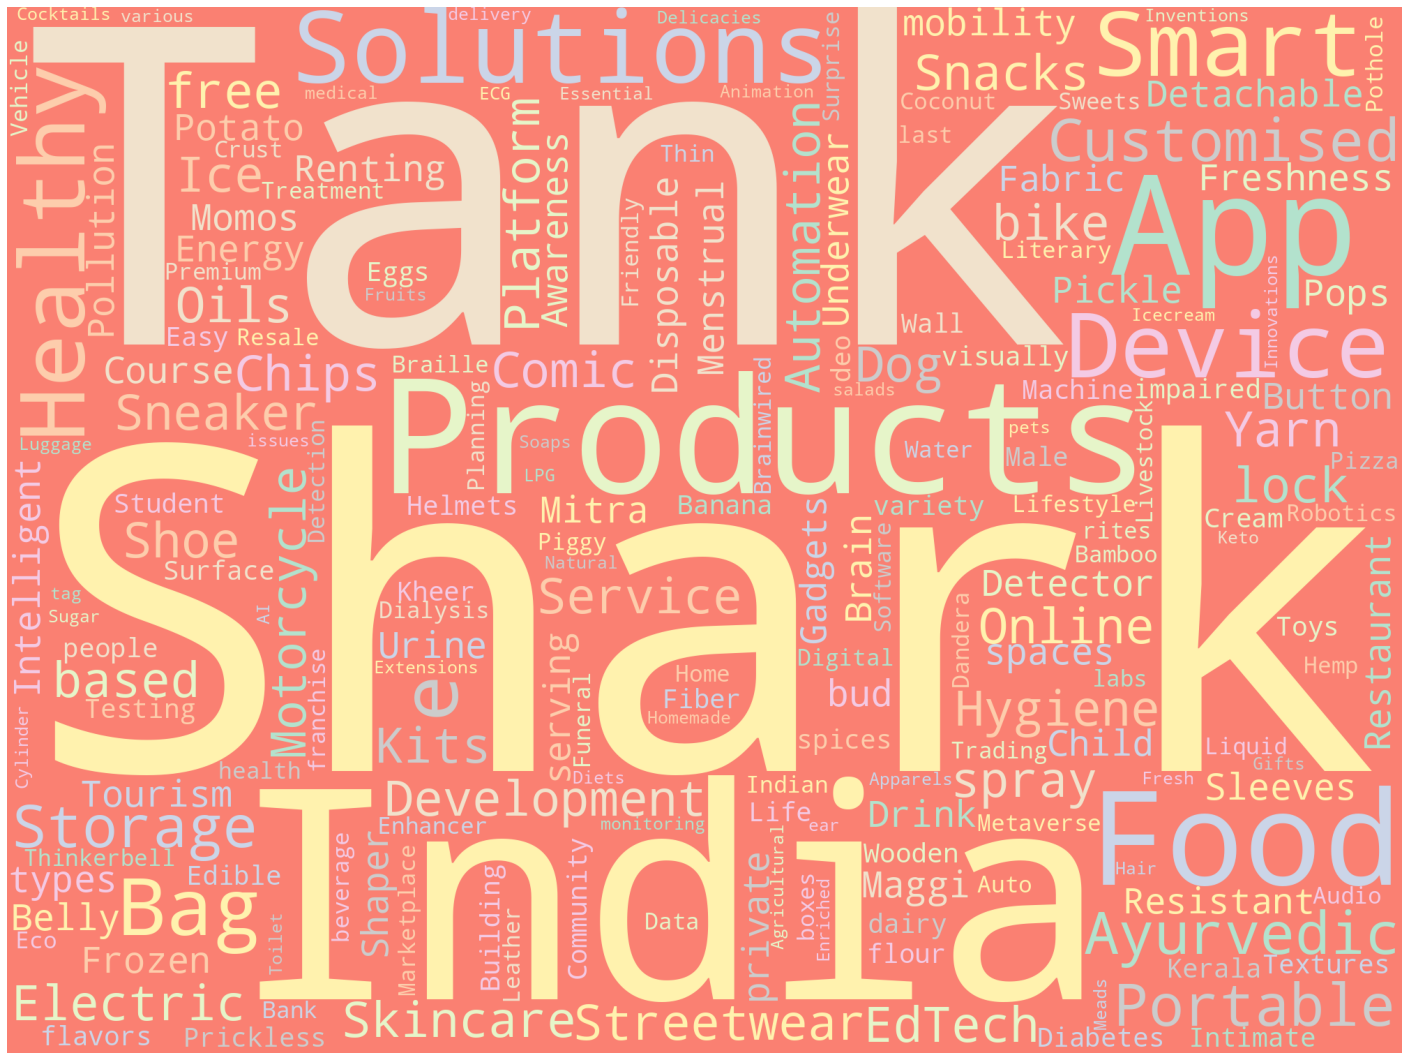

In [45]:
# Word cloud based on Business Description
text = " Shark Tank India ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel2', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Data set values verification
##### below queries should not return any rows

In [46]:
shark_tank.loc[shark_tank['Number of Presenters'] != shark_tank['Male Presenter'].fillna(0) + shark_tank['Female Presenter'].fillna(0)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [47]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [48]:
shark_tank.loc[(shark_tank['Male Presenter'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [49]:
shark_tank.loc[(shark_tank['Female Presenter'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [50]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Ashneer Investment Amount'].fillna(0) + shark_tank['Namita Investment Amount'].fillna(0) + shark_tank['Anupam Investment Amount'].fillna(0) + shark_tank['Vineeta Investment Amount'].fillna(0) + shark_tank['Aman Investment Amount'].fillna(0) + shark_tank['Peyush Investment Amount'].fillna(0) + shark_tank['Ghazal Investment Amount'].fillna(0), 1)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [51]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Ashneer Investment Equity'].fillna(0) + shark_tank['Namita Investment Equity'].fillna(0) + shark_tank['Anupam Investment Equity'].fillna(0) + shark_tank['Vineeta Investment Equity'].fillna(0) + shark_tank['Aman Investment Equity'].fillna(0) + shark_tank['Peyush Investment Equity'].fillna(0) + shark_tank['Ghazal Investment Equity'].fillna(0),1)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [52]:
shark_tank.loc[round(shark_tank['Total Deal Debt'].fillna(0),1) != round(shark_tank['Ashneer Debt Amount'].fillna(0) + shark_tank['Namita Debt Amount'].fillna(0) + shark_tank['Anupam Debt Amount'].fillna(0) + shark_tank['Vineeta Debt Amount'].fillna(0) + shark_tank['Aman Debt Amount'].fillna(0) + shark_tank['Peyush Debt Amount'].fillna(0) + shark_tank['Ghazal Debt Amount'].fillna(0),1)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [53]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenter,Female Presenter,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Season Number,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Episode Number,nan,1.000000,0.998874,-0.012831,0.063426,-0.168494,0.233836,0.374142,0.217058,-0.017264,-0.105350,-0.070837,-0.101707,-0.013888,-0.093228,-0.230791,-0.012258,-0.005052,0.144845,-0.059598,-0.030034,-0.039051,1.000000,0.062158,0.079419,nan,-0.130586,-0.122271,nan,-0.032484,-0.302209,nan,-0.070180,-0.025619,nan,0.080449,0.009889,0.035945,-0.029239,-0.072721,nan,0.111119
Pitch Number,nan,0.998874,1.000000,-0.012865,0.059607,-0.165804,0.244985,0.377819,0.219984,-0.018666,-0.117280,-0.075863,-0.106718,-0.014647,-0.096161,-0.241335,-0.019670,-0.005390,0.151422,-0.058731,-0.023299,-0.024034,1.000000,0.052519,0.073819,nan,-0.137392,-0.120447,nan,-0.036117,-0.290707,nan,-0.075704,-0.039404,nan,0.087075,0.009053,0.028267,-0.059523,-0.084542,nan,0.106700
Number of Presenters,nan,-0.012831,-0.012865,1.000000,0.771610,0.402817,0.093848,0.099005,0.029181,-0.137408,-0.210064,-0.106502,-0.215936,-0.091405,0.089887,-0.092300,0.135661,-0.335785,0.140802,0.273789,0.032021,-0.083912,nan,-0.072939,-0.111257,nan,0.173310,-0.127911,nan,0.160085,-0.223706,nan,-0.011925,0.063708,nan,0.070445,-0.226609,0.460721,0.295510,-0.173139,nan,0.138681
Male Presenter,nan,0.063426,0.059607,0.771610,1.000000,-0.158876,-0.091614,0.008561,0.114395,-0.203566,-0.059904,-0.075309,-0.201248,-0.048613,0.192875,-0.006110,-0.002795,-0.224358,0.373901,0.224083,-0.035609,-0.058563,1.000000,-0.112981,-0.225774,nan,0.230888,-0.008907,nan,-0.046414,-0.238381,nan,0.014829,0.067490,nan,-0.056195,-0.150792,-0.039653,0.258409,-0.094657,nan,0.079284
Female Presenter,nan,-0.168494,-0.165804,0.402817,-0.158876,1.000000,-0.216025,nan,-0.228947,-0.170697,-0.010244,-0.130915,0.091566,0.074399,-0.081932,-0.158816,-0.225348,-0.015846,nan,-0.178713,-0.210038,-0.204951,nan,-0.188110,-0.101794,nan,0.175822,0.088983,nan,nan,nan,nan,0.021036,0.221065,nan,-0.153340,-0.020392,nan,nan,nan,nan,0.063509
Couple Presenters,nan,0.233836,0.244985,0.093848,-0.091614,-0.216025,1.000000,0.180535,-0.056299,-0.006993,-0.126716,-0.017218,-0.122195,-0.009528,0.086280,-0.119730,-0.015604,-0.129265,0.121625,0.064205,nan,nan,nan,0.128189,0.023073,nan,-0.088903,-0.082953,nan,-0.152309,-0.132721,nan,-0.108424,-0.075496,nan,0.117394,-0.056119,0.544331,nan,nan,nan,-0.027586
Started in,nan,0.374142,0.377819,0.099005,0.008561,nan,0.180535,1.000000,-0.295979,-0.502508,0.294344,-0.188971,-0.075074,-0.179326,-0.204731,0.240264,0.228505,-0.584544,1.000000,0.424150,-0.153093,-0.133430,nan,0.370962,0.465530,nan,0.236328,0.237703,nan,0.092311,0.014333,nan,0.756503,0.589165,nan,-0.506043,-0.786715,1.000000,0.626212,0.637001,nan,0.241277
Yearly Revenue,nan,0.217058,0.219984,0.029181,0.114395,-0.228947,-0.056299,-0.295979,1.000000,0.251232,0.423593,-0.049069,-0.192460,0.246350,0.215855,-0.334906,0.362257,-0.002209,nan,0.339459,0.543293,-0.226970,nan,-0.210607,-0.154535,nan,-0.147037,-0.120576,nan,-0.257582,-0.329466,nan,0.282247,0.507952,nan,-0.196895,-0.202211,nan,0.964455,-0.511120,nan,-0.426701
Monthly Sales,nan,-0

In [54]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))

# numpy version: 1.20.3
# pandas version: 1.3.5
# matplotlib version: 3.5.1
# seaborn version: 0.11.2

numpy version: 1.20.3
pandas version: 1.3.5
matplotlib version: 3.5.1
seaborn version: 0.11.2
